In [ ]:
# Импортируем нужные нам библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Установка стиля для визуализаций
sns.set(style="whitegrid")

In [13]:
# Загрузка данных
train = pd.read_csv('data/train.csv', nrows=1000000)
questions = pd.read_csv('data/questions.csv')
lectures = pd.read_csv('data/lectures.csv')

In [14]:
# Вывод первых строк и информации о данных
display(train.head())
display(train.info())
display(questions.head())
display(questions.info())
display(lectures.head())
display(lectures.info())

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1000000 non-null  int64  
 1   timestamp                       1000000 non-null  int64  
 2   user_id                         1000000 non-null  int64  
 3   content_id                      1000000 non-null  int64  
 4   content_type_id                 1000000 non-null  int64  
 5   task_container_id               1000000 non-null  int64  
 6   user_answer                     1000000 non-null  int64  
 7   answered_correctly              1000000 non-null  int64  
 8   prior_question_elapsed_time     976277 non-null   float64
 9   prior_question_had_explanation  996184 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 76.3+ MB


None

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


None

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


None

In [15]:
# Меняем типы данных в нужных нам столбцах

train['row_id'] = train['row_id'].astype('int64')
train['user_id'] = train['user_id'].astype('int32')
train['content_id'] = train['content_id'].astype('int16')
train['content_type_id'] = train['content_type_id'].astype('int8')
train['task_container_id'] = train['task_container_id'].astype('int16')
train['user_answer'] = train['user_answer'].astype('int8')
train['answered_correctly'] = train['answered_correctly'].astype('int8')
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'].astype('float32')
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('bool')

questions['question_id'] = questions['question_id'].astype('int16')
questions['bundle_id'] = questions['bundle_id'].astype('int16')
questions['correct_answer'] = questions['correct_answer'].astype('int16')
questions['part'] = questions['part'].astype('int16')

lectures['lecture_id'] = lectures['lecture_id'].astype('int16')
lectures['tag'] = lectures['tag'].astype('int16')
lectures['part'] = lectures['part'].astype('int16')

In [7]:
# Проверка на наличие пропусков
print('Пропуски в данных train.csv\n')
print(train.isna().sum())
print('\nПропуски в данных questions.csv:\n')
print(questions.isna().sum())
print('\nПропуски в данных lectures.csv:\n')
print(lectures.isna().sum())

Пропуски в данных train.csv

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation          0
dtype: int64

Пропуски в данных questions.csv:

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

Пропуски в данных lectures.csv:

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64


In [16]:
# Заполнение пропусков
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'].fillna(train['prior_question_elapsed_time'].median())

# Заполнение пропусков для prior_question_had_explanation
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].fillna(False).astype(bool)

# Преобразование булевых значений для prior_question_had_explanation
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype(bool)

# Фильтрация только для вопросов (content_type_id == 0) и объединение с questions для анализа метаданных вопросов
train_questions = train[train['content_type_id'] == 0].merge(
    questions, left_on='content_id', right_on='question_id', how='left'
)

In [ ]:
# Аналитика
# 1. Процент правильно отвеченных вопросов
overall_correct_rate = train_questions['answered_correctly'].mean()
print('\nОбщий процент правильно отвеченных вопросов: {overall_correct_rate * 100:.2f}%')

# 2. Влияние времени на правильность ответа
time_correct_corr = train_questions[['prior_question_elapsed_time', 'answered_correctly']].corr().iloc[0, 1]
print(f'\nКорреляция между временем ответа и правильностью: {time_correct_corr:.2f}')

# 3. Влияние объяснений на правильность ответа
explanation_effect = train_questions.groupby('prior_question_had_explanation')['answered_correctly'].mean()
print(f'\nВлияние объяснений на правильность ответа:\n {explanation_effect}')

# 4. Анализ роли лекций: среднее количество просмотренных лекций на пользователя
lecture_count_per_user = train[train['content_type_id'] == 1].groupby('user_id').size().mean()
print(f'\nСреднее количество просмотренных лекций на пользователя: {lecture_count_per_user:.2f}')

# 5. Частота ошибок по частям вопросов (анализ на основе question part)
error_rate_per_part = train_questions.groupby('part')['answered_correctly'].apply(lambda x: 1 - x.mean())
print('\nЧастота ошибок по частям вопросов:\n {error_rate_per_part}')



Общий процент правильно отвеченных вопросов: 65.04%

Корреляция между временем ответа и правильностью: 0.00

Влияние объяснений на правильность ответа:
 prior_question_had_explanation
False    0.488795
True     0.665975
Name: answered_correctly, dtype: float64

Среднее количество просмотренных лекций на пользователя: 13.50

Частота ошибок по частям вопросов:
 part
1    0.264166
2    0.292742
3    0.307904
4    0.379041
5    0.393679
6    0.349305
7    0.354859
Name: answered_correctly, dtype: float64


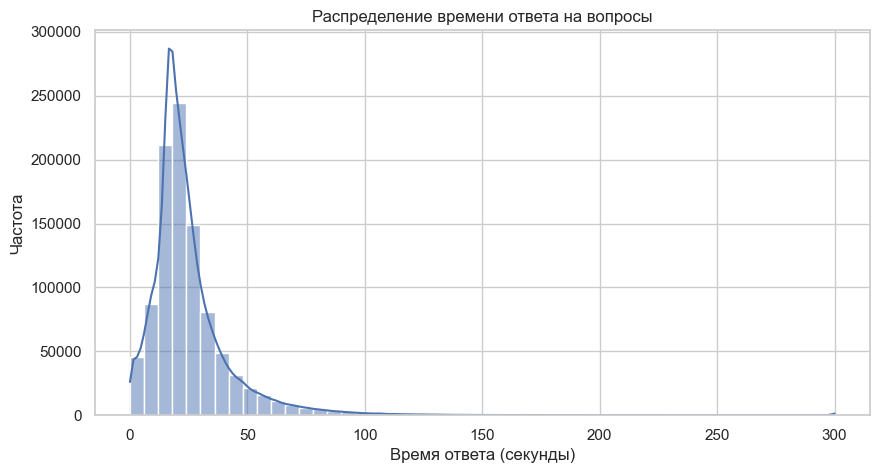

In [28]:
# 1. Распределение времени ответа на вопросы
plt.figure(figsize=(10, 5))
# Переводим время ответа в секунды
sns.histplot(train_questions['prior_question_elapsed_time'].dropna() / 1000, bins=50, kde=True)
plt.title('Распределение времени ответа на вопросы')
plt.xlabel('Время ответа (секунды)')
plt.ylabel('Частота')
plt.show()


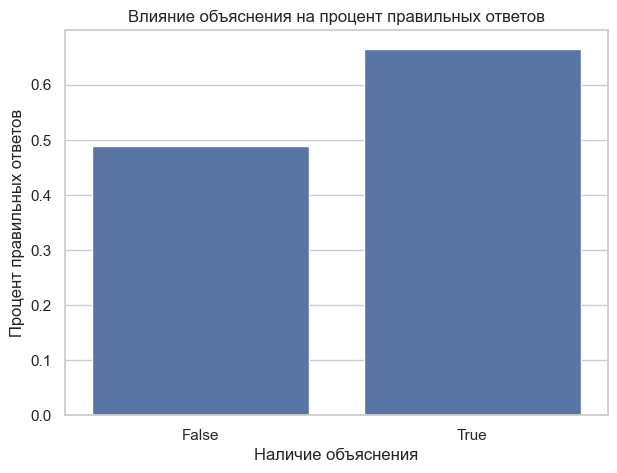

In [29]:
# 2. Корреляция наличия объяснения и правильности ответа
plt.figure(figsize=(7, 5))
sns.barplot(x=explanation_effect.index, y=explanation_effect.values)
plt.title("Влияние объяснения на процент правильных ответов")
plt.xlabel("Наличие объяснения")
plt.ylabel("Процент правильных ответов")
plt.show()


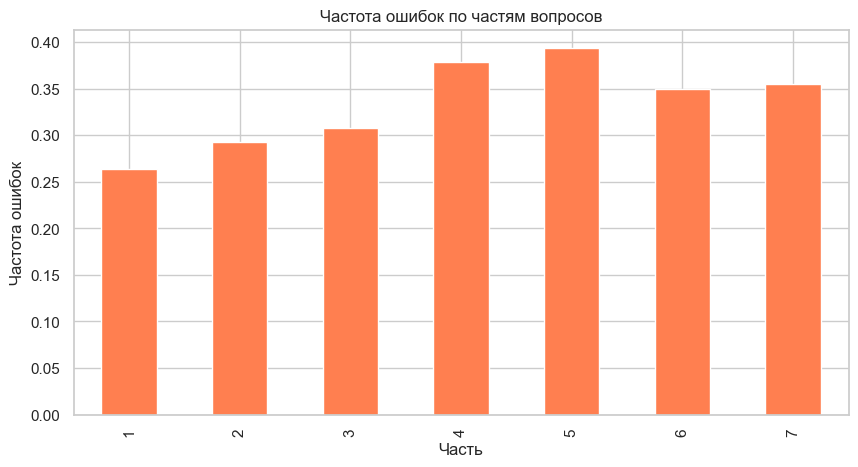

In [31]:
# 3. Частота ошибок по частям вопросов
plt.figure(figsize=(10, 5))
error_rate_per_part.plot(kind='bar', color='coral')
plt.title("Частота ошибок по частям вопросов")
plt.xlabel("Часть")
plt.ylabel("Частота ошибок")
plt.show()

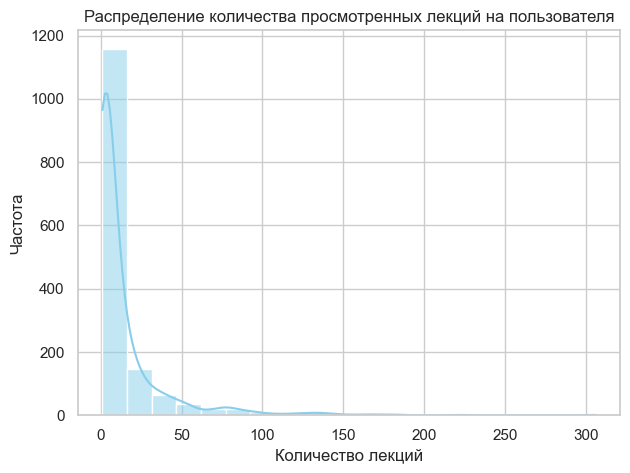

In [30]:
# 4. Количество просмотренных лекций каждым пользователем (суммируем по user_id)
lecture_count_per_user = train[train['content_type_id'] == 1].groupby('user_id').size()

# 5. Визуализация распределения количества просмотренных лекций
plt.figure(figsize=(7, 5))
sns.histplot(lecture_count_per_user, kde=True, bins=20, color='skyblue')
plt.title("Распределение количества просмотренных лекций на пользователя")
plt.xlabel("Количество лекций")
plt.ylabel("Частота")
plt.show()